### Data Collection

In [ ]:
import numpy as np
import pandas as pd

/kaggle/input/moviedataset/Movie dataset.csv


In [ ]:
df = pd.read_csv('/kaggle/input/moviedataset/Movie dataset.csv', encoding='latin-1')
df.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15509 entries, 0 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      15509 non-null  object 
 1   Year      14981 non-null  object 
 2   Duration  7240 non-null   object 
 3   Genre     13632 non-null  object 
 4   Rating    7919 non-null   float64
 5   Votes     7920 non-null   object 
 6   Director  14984 non-null  object 
 7   Actor 1   13892 non-null  object 
 8   Actor 2   13125 non-null  object 
 9   Actor 3   12365 non-null  object 
dtypes: float64(1), object(9)
memory usage: 1.2+ MB


In [ ]:
df[['Director','Actor 1','Actor 2']]

,Director,Actor 1,Actor 2
0,J.S. Randhawa,Manmauji,Birbal
1,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande
2,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur
3,Ovais Khan,Prateik,Ishita Raj
4,Amol Palekar,Rajat Kapoor,Rituparna Sengupta
...,...,...,...
15504,Mahendra Shah,Naseeruddin Shah,Sumeet Saigal
15505,Kuku Kohli,Akshay Kumar,Twinkle Khanna
15506,Kiran Thej,Sangeeta Tiwari,NaN
15507,NaN,NaN,NaN


### Exploratory Data Analysis(EDA)

In [ ]:
# 1. name
df = df[df['Name']!=' ']
df.reset_index(drop=True, inplace=True)

In [ ]:
#2. Year
def extract_year(row):
    try:
        return row.strip("()")
    except:
        pass

In [ ]:
df.loc[:,'Year'] = df['Year'].apply(extract_year)

In [ ]:
df['Year']

0        2019
1        2021
2        2019
3        2010
4        1997
         ... 
15503    1988
15504    1999
15505    2005
15506    1988
15507    1998
Name: Year, Length: 15508, dtype: object

In [ ]:
def extract_min(row):
    try:
        return row.split()[0]
    except:
        pass

In [ ]:
df['Duration']=df['Duration'].apply(extract_min)

In [ ]:
mean = df['Duration'].astype(float).mean()
df['Duration'] = df['Duration'].fillna(mean)

In [ ]:
df['Duration'] = df['Duration'].astype(float)

In [ ]:
df['Duration']

0        109.000000
1         90.000000
2        110.000000
3        105.000000
4        147.000000
            ...    
15503    128.126519
15504    129.000000
15505    128.126519
15506    128.126519
15507    130.000000
Name: Duration, Length: 15508, dtype: float64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15508 entries, 0 to 15507
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      15508 non-null  object 
 1   Year      14981 non-null  object 
 2   Duration  15508 non-null  float64
 3   Genre     13631 non-null  object 
 4   Rating    7919 non-null   float64
 5   Votes     7920 non-null   object 
 6   Director  14983 non-null  object 
 7   Actor 1   13891 non-null  object 
 8   Actor 2   13124 non-null  object 
 9   Actor 3   12364 non-null  object 
dtypes: float64(2), object(8)
memory usage: 1.2+ MB


In [ ]:
pip install ydata-profiling

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.2/18.2 MB 46.3 MB/s eta 0:00:00:00:0100:01
  Attempting uninstall: numpy
    Found existing installation: numpy 1.26.4
    Uninstalling numpy-1.26.4:
      Successfully uninstalled numpy-1.26.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
keras-nlp 0.8.2 requires keras-core, which is not installed.
tensorflow-decision-forests 1.8.1 requires wurlitzer, which is not installed.
apache-beam 2.46.0 requires dill<0.3.2,>=0.3.1.1, but you have dill 0.3.8 which is incompatible.
apache-beam 2.46.0 requires numpy<1.25.0,>=1.14.3, but you have numpy 1.25.2 which is incompatible.
apache-beam 2.46.0 requires pyarrow<10.0.0,>=3.0.0, but you have pyarrow 15.0.2 which is incompatible.
libpysal 4.9.2 requires packaging>=22, but you have packaging 21.3 which is incompatible.
libpysal 4.9.2 requires shapely>=2.0.1, but you have sh

In [ ]:
from ydata_profiling import ProfileReport

In [ ]:
df.dropna(subset=['Director'],inplace=True)

In [ ]:
df.reset_index(drop=True, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14983 entries, 0 to 14982
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      14983 non-null  object 
 1   Year      14484 non-null  object 
 2   Duration  14983 non-null  float64
 3   Genre     13130 non-null  object 
 4   Rating    7914 non-null   float64
 5   Votes     7915 non-null   object 
 6   Director  14983 non-null  object 
 7   Actor 1   13891 non-null  object 
 8   Actor 2   13124 non-null  object 
 9   Actor 3   12364 non-null  object 
dtypes: float64(2), object(8)
memory usage: 1.1+ MB


In [ ]:
#only going with that which have rating data
df1 = df[df['Rating'].notnull()]

In [ ]:
df1.reset_index(drop=True, inplace=True)

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7914 entries, 0 to 7913
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      7914 non-null   object 
 1   Year      7914 non-null   object 
 2   Duration  7914 non-null   float64
 3   Genre     7812 non-null   object 
 4   Rating    7914 non-null   float64
 5   Votes     7914 non-null   object 
 6   Director  7914 non-null   object 
 7   Actor 1   7794 non-null   object 
 8   Actor 2   7719 non-null   object 
 9   Actor 3   7627 non-null   object 
dtypes: float64(2), object(8)
memory usage: 618.4+ KB


In [ ]:
df1.drop(columns=['Name','Votes','Actor 2','Actor 3'],inplace=True)

/tmp/ipykernel_33/954518303.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.drop(columns=['Name','Votes','Actor 2','Actor 3'],inplace=True)


In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7914 entries, 0 to 7913
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Year      7914 non-null   object 
 1   Duration  7914 non-null   float64
 2   Genre     7812 non-null   object 
 3   Rating    7914 non-null   float64
 4   Director  7914 non-null   object 
 5   Actor 1   7794 non-null   object 
dtypes: float64(2), object(4)
memory usage: 371.1+ KB


In [ ]:
df1['Genre']=df1['Genre'].fillna('Unknown')
#df1['Director']=df1['Director'].fillna('Unknown')
df1['Actor 1']=df1['Actor 1'].fillna('Unknown')
#df1['Actor 2']=df1['Actor 2'].fillna('Unknown')
#df['Actor 3']=df['Actor 3'].fillna('Unknown')
#df.fillna({'Year': df["Year"].mode()[0]},inplace=True)
df.reset_index(drop=True, inplace=True)

/tmp/ipykernel_33/2085767678.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Genre']=df1['Genre'].fillna('Unknown')
/tmp/ipykernel_33/2085767678.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Actor 1']=df1['Actor 1'].fillna('Unknown')


In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7914 entries, 0 to 7913
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Year      7914 non-null   object 
 1   Duration  7914 non-null   float64
 2   Genre     7914 non-null   object 
 3   Rating    7914 non-null   float64
 4   Director  7914 non-null   object 
 5   Actor 1   7914 non-null   object 
dtypes: float64(2), object(4)
memory usage: 371.1+ KB


In [ ]:
profile = ProfileReport(df1,explorative=True)
profile.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
df1.drop_duplicates(inplace=True)

/tmp/ipykernel_33/4156330626.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.drop_duplicates(inplace=True)


In [ ]:
df1[df1.duplicated()]

,Year,Duration,Genre,Rating,Director,Actor 1


In [ ]:
df1.reset_index(drop=True,inplace=True)

In [ ]:
df1['Genre'].value_counts()[:25]

Genre
Drama                      1176
Drama, Romance              447
Action, Crime, Drama        417
Action                      414
Drama, Family               291
Action, Drama               270
Comedy                      259
Comedy, Drama               239
Romance                     234
Comedy, Drama, Romance      213
Action, Comedy, Drama       142
Thriller                    132
Horror                      129
Action, Drama, Romance      129
Comedy, Romance             120
Action, Thriller            113
Drama, Musical, Romance     103
Unknown                     102
Action, Comedy, Crime        89
Documentary                  84
Comedy, Drama, Family        65
Action, Drama, Thriller      64
Drama, Thriller              63
Crime, Drama                 63
Crime, Drama, Thriller       61
Name: count, dtype: int64

In [ ]:
top_genres = ['Drama', 'Comedy', 'Action', 'Thriller', 'Romance', 'Adventure', 'Crime', 'Horror', 'Sci-Fi', 'Fantasy']

In [ ]:
#split the genre value and strip them
df1['Genre'] = df1['Genre'].apply(lambda x: [genre.strip() for genre in x.split(',')] )

/tmp/ipykernel_33/2885063268.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Genre'] = df1['Genre'].apply(lambda x: [genre.strip() for genre in x.split(',')] )


In [ ]:
df1['Genre']

0                           [Drama]
1                 [Comedy, Romance]
2          [Comedy, Drama, Musical]
3             [Drama, Romance, War]
4       [Horror, Mystery, Thriller]
                   ...             
7907         [Action, Crime, Drama]
7908         [Action, Crime, Drama]
7909                       [Action]
7910                [Action, Drama]
7911                [Action, Drama]
Name: Genre, Length: 7912, dtype: object

In [ ]:
set(genre for sublist in df1['Genre'] for genre in sublist)

{'Action',
 'Adventure',
 'Animation',
 'Biography',
 'Comedy',
 'Crime',
 'Documentary',
 'Drama',
 'Family',
 'Fantasy',
 'History',
 'Horror',
 'Music',
 'Musical',
 'Mystery',
 'News',
 'Romance',
 'Sci-Fi',
 'Sport',
 'Thriller',
 'Unknown',
 'War',
 'Western'}

### Feature Engineering and Data Preprocessing

In [ ]:
df1['Total_Genres'] = df1['Genre'].apply(lambda x: len(x))

/tmp/ipykernel_33/1974135053.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Total_Genres'] = df1['Genre'].apply(lambda x: len(x))


In [ ]:
df1['Genre']

0                           [Drama]
1                 [Comedy, Romance]
2          [Comedy, Drama, Musical]
3             [Drama, Romance, War]
4       [Horror, Mystery, Thriller]
                   ...             
7909         [Action, Crime, Drama]
7910         [Action, Crime, Drama]
7911                       [Action]
7912                [Action, Drama]
7913                [Action, Drama]
Name: Genre, Length: 7912, dtype: object

In [ ]:
# Create a list to store binary representations of movie genres for each movie
binary_representation_list = []

# Convert movie genres to binary representation for each movie
for movie_genres in df1['Genre']:
    binary_representation = []
    for genre in top_genres:
        if genre in movie_genres:
            binary_representation.append(1)
        else:
            binary_representation.append(0)
    # Check if any genre outside of the top 10 is present
    if not any(genre in top_genres for genre in movie_genres):
        binary_representation.append(1)  # 'Other' column
    else:
        binary_representation.append(0)
    binary_representation_list.append(binary_representation)

b = pd.DataFrame(binary_representation_list,columns=top_genres+['Others'])

In [ ]:
df1 = pd.concat([df1,b],axis=1)

In [ ]:
# Now, 'Total_Genres' column contains the total number of genres present in each movie
#df.drop(columns=['Votes','Name','Actor 3'],inplace=True)
df1.head()

,Year,Duration,Genre,Rating,Director,Actor 1,Total_Genres,Drama,Comedy,Action,Thriller,Romance,Adventure,Crime,Horror,Sci-Fi,Fantasy,Others
0,2019,109.0,[Drama],7.0,Gaurav Bakshi,Rasika Dugal,1,1,0,0,0,0,0,0,0,0,0,0
1,2019,110.0,"[Comedy, Romance]",4.4,Ovais Khan,Prateik,2,0,1,0,0,1,0,0,0,0,0,0
2,1997,147.0,"[Comedy, Drama, Musical]",4.7,Rahul Rawail,Bobby Deol,3,1,1,0,0,0,0,0,0,0,0,0
3,2005,142.0,"[Drama, Romance, War]",7.4,Shoojit Sircar,Jimmy Sheirgill,3,1,0,0,0,1,0,0,0,0,0,0
4,2012,82.0,"[Horror, Mystery, Thriller]",5.6,Allyson Patel,Yash Dave,3,0,0,0,1,0,0,0,1,0,0,0


In [ ]:
df1.drop(columns = ['Genre'],inplace=True)

In [ ]:
#df.fillna({'Actor 1': "Unknown"},inplace=True)
#df.fillna({'Actor 2': "Unknown"},inplace=True)
#df.fillna({'Actor 3': "Unknown"},inplace=True)
#df.fillna({'Rating': df["Rating"].mean()},inplace=True)
#df.fillna({'Year': df["Year"].mode()[0]},inplace=True)

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7912 entries, 0 to 7911
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Year          7912 non-null   object 
 1   Duration      7912 non-null   float64
 2   Rating        7912 non-null   float64
 3   Director      7912 non-null   object 
 4   Actor 1       7912 non-null   object 
 5   Total_Genres  7912 non-null   int64  
 6   Drama         7912 non-null   int64  
 7   Comedy        7912 non-null   int64  
 8   Action        7912 non-null   int64  
 9   Thriller      7912 non-null   int64  
 10  Romance       7912 non-null   int64  
 11  Adventure     7912 non-null   int64  
 12  Crime         7912 non-null   int64  
 13  Horror        7912 non-null   int64  
 14  Sci-Fi        7912 non-null   int64  
 15  Fantasy       7912 non-null   int64  
 16  Others        7912 non-null   int64  
dtypes: float64(2), int64(12), object(3)
memory usage: 1.0+ MB


In [ ]:
df1.sample(5)

,Year,Duration,Rating,Director,Actor 1,Total_Genres,Drama,Comedy,Action,Thriller,Romance,Adventure,Crime,Horror,Sci-Fi,Fantasy,Others
4343,2015,122.000000,5.2,Raj Shetty,Mohit Madaan,1,0,0,0,0,1,0,0,0,0,0,0
4569,2004,90.000000,6.9,Anup Kurian,Atul Kulkarni,1,1,0,0,0,0,0,0,0,0,0,0
7558,1948,128.126519,7.7,Girish Trivedi,Suraiya,2,1,0,0,0,1,0,0,0,0,0,0
2205,2016,159.000000,5.1,Rajkumar R. Pandey,Pradeep Pandey,3,1,0,1,0,0,0,0,0,0,0,0
7388,2005,128.126519,4.9,N.S. Raj Bharath,Sumit Nijhawan,1,0,0,0,0,1,0,0,0,0,0,0


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

<Axes: ylabel='Frequency'>

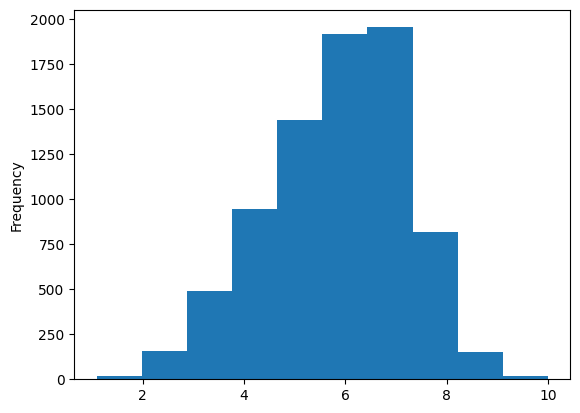

In [ ]:
df1['Rating'].plot(kind='hist')

In [ ]:
X = df1.drop(columns = ['Rating'])
y = df1['Rating']

In [ ]:
X

,Year,Duration,Director,Actor 1,Total_Genres,Drama,Comedy,Action,Thriller,Romance,Adventure,Crime,Horror,Sci-Fi,Fantasy,Others
0,2019,109.000000,Gaurav Bakshi,Rasika Dugal,1,1,0,0,0,0,0,0,0,0,0,0
1,2019,110.000000,Ovais Khan,Prateik,2,0,1,0,0,1,0,0,0,0,0,0
2,1997,147.000000,Rahul Rawail,Bobby Deol,3,1,1,0,0,0,0,0,0,0,0,0
3,2005,142.000000,Shoojit Sircar,Jimmy Sheirgill,3,1,0,0,0,1,0,0,0,0,0,0
4,2012,82.000000,Allyson Patel,Yash Dave,3,0,0,0,1,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7907,1992,128.126519,Bharat Rangachary,Dharmendra,3,1,0,1,0,0,0,1,0,0,0,0
7908,1989,125.000000,S.P. Muthuraman,Chiranjeevi,3,1,0,1,0,0,0,1,0,0,0,0
7909,1988,128.126519,Mahendra Shah,Naseeruddin Shah,1,0,0,1,0,0,0,0,0,0,0,0
7910,1999,129.000000,Kuku Kohli,Akshay Kumar,2,1,0,1,0,0,0,0,0,0,0,0


In [ ]:
from category_encoders.binary import BinaryEncoder

In [ ]:
binary_encoder = BinaryEncoder(cols=['Director','Actor 1'])

In [ ]:
encoded_data = binary_encoder.fit_transform(X)

#X_encoded = pd.concate([X,encoded_data],axis=1)
encoded_data

,Year,Duration,Director_0,Director_1,Director_2,Director_3,Director_4,Director_5,Director_6,Director_7,...,Comedy,Action,Thriller,Romance,Adventure,Crime,Horror,Sci-Fi,Fantasy,Others
0,2019,109.000000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2019,110.000000,0,0,0,0,0,0,0,0,...,1,0,0,1,0,0,0,0,0,0
2,1997,147.000000,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
3,2005,142.000000,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,2012,82.000000,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7907,1992,128.126519,0,0,1,0,0,1,1,0,...,0,1,0,0,0,1,0,0,0,0
7908,1989,125.000000,0,0,0,1,0,0,1,1,...,0,1,0,0,0,1,0,0,0,0
7909,1988,128.126519,1,0,0,1,0,1,1,0,...,0,1,0,0,0,0,0,0,0,0
7910,1999,129.000000,0,0,0,1,1,0,1,1,...,0,1,0,0,0,0,0,0,0,0


In [ ]:
X['Year'] = pd.to_datetime(X['Year'], format='%Y').dt.year


In [ ]:
X['Year']

0       2019
1       2019
2       1997
3       2005
4       2012
        ... 
7907    1992
7908    1989
7909    1988
7910    1999
7911    1998
Name: Year, Length: 7912, dtype: int32

In [ ]:
encoded_data.columns

Index(['Year', 'Duration', 'Director_0', 'Director_1', 'Director_2',
       'Director_3', 'Director_4', 'Director_5', 'Director_6', 'Director_7',
       'Director_8', 'Director_9', 'Director_10', 'Director_11', 'Actor 1_0',
       'Actor 1_1', 'Actor 1_2', 'Actor 1_3', 'Actor 1_4', 'Actor 1_5',
       'Actor 1_6', 'Actor 1_7', 'Actor 1_8', 'Actor 1_9', 'Actor 1_10',
       'Actor 1_11', 'Total_Genres', 'Drama', 'Comedy', 'Action', 'Thriller',
       'Romance', 'Adventure', 'Crime', 'Horror', 'Sci-Fi', 'Fantasy',
       'Others'],
      dtype='object')

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
scaler = MinMaxScaler()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(encoded_data, y, test_size=0.2, random_state=42)

In [ ]:
X_train['Duration'] = scaler.fit_transform(X_train[['Duration']])
X_test['Duration'] = scaler.transform(X_test[['Duration']])

In [ ]:
X_train

,Year,Duration,Director_0,Director_1,Director_2,Director_3,Director_4,Director_5,Director_6,Director_7,...,Comedy,Action,Thriller,Romance,Adventure,Crime,Horror,Sci-Fi,Fantasy,Others
2439,1933,0.168459,0,1,0,1,0,1,1,0,...,0,0,0,1,0,0,0,0,0,0
1765,1985,0.304659,0,0,0,0,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
7350,1995,0.594982,0,0,0,1,0,1,0,1,...,0,1,0,0,0,0,0,0,0,0
4823,1967,0.383966,0,0,1,0,1,1,0,1,...,0,0,0,1,0,0,0,0,0,0
1410,2012,0.354839,0,0,1,1,1,0,1,0,...,1,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5226,2007,0.372760,0,0,1,1,1,1,0,1,...,1,1,0,0,0,1,0,0,0,0
5390,1977,0.394265,0,1,0,1,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
860,1995,0.580645,0,0,1,0,0,1,1,0,...,0,1,1,0,0,1,0,0,0,0
7603,1972,0.318996,0,0,0,0,1,1,1,0,...,0,1,0,0,0,1,0,0,0,0


### Model Building and Evaluation

In [ ]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

# Step 5: Make Predictions
predictions = model.predict(X_test)

# Step 6: Evaluate Model
mse = mean_squared_error(y_test, predictions)
print("Mean Squared Error:", mse)
r2_score(y_test,predictions)

Mean Squared Error: 1.6195071416176288


0.1372937747515821

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

In [ ]:
model = RandomForestRegressor(max_depth=13)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Squared Error: 1.4200664035757222
R-squared: 0.24353521194897076


In [ ]:
# Gradient Boosting
model = GradientBoostingRegressor(n_estimators=100)
model.fit(X_train, y_train)


y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Model: {model.__class__.__name__}")
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Model: GradientBoostingRegressor
Mean Squared Error: 1.4139041311222935
R-squared: 0.2468178345880656


In [ ]:
from xgboost import XGBRegressor
model = XGBRegressor(objective='reg:squarederror')
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Model: {model.__class__.__name__}")
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Model: XGBRegressor
Mean Squared Error: 1.541395701908662
R-squared: 0.17890348647704757


In [ ]:
from lightgbm import LGBMRegressor

model = LGBMRegressor()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Model: {model.__class__.__name__}")
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005717 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 311
[LightGBM] [Info] Number of data points in the train set: 6329, number of used features: 38
[LightGBM] [Info] Start training from score 5.843372
Model: LGBMRegressor
Mean Squared Error: 1.417051038157464
R-squared: 0.24514148737121555


In [ ]:
X_test

,Year,Duration,Director_0,Director_1,Director_2,Director_3,Director_4,Director_5,Director_6,Director_7,...,Comedy,Action,Thriller,Romance,Adventure,Crime,Horror,Sci-Fi,Fantasy,Others
2815,2002,0.193548,0,1,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
7569,1986,0.383966,0,1,0,0,1,0,0,0,...,0,1,0,1,0,0,0,0,0,0
4554,1951,0.383966,1,0,0,0,0,1,1,1,...,0,0,0,0,0,0,0,0,0,0
3438,1979,0.376344,0,0,1,1,0,0,1,0,...,1,0,0,0,0,1,0,0,0,0
3023,2009,0.383966,0,1,1,0,0,1,0,0,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
622,1993,0.508961,0,0,0,1,1,0,0,1,...,0,0,0,1,0,0,0,0,0,0
1419,1977,0.501792,0,0,0,0,0,1,1,1,...,1,1,0,0,0,0,0,0,0,0
3937,1987,0.383966,0,0,0,0,1,1,1,0,...,0,1,0,0,0,1,0,0,0,0
7826,1984,0.383966,0,0,0,0,1,0,1,1,...,0,1,1,0,0,0,0,0,0,0


In [ ]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

# Step 2: Define the Neural Network Architecture
model = Sequential([
    Dense(64, activation='relu', input_shape=(38,)),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dropout(0.2),
    Dense(1)  # Output layer for regression task
])

# Step 3: Compile the Model
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['r2_score'])

# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=3, verbose=1)

# Step 4: Train the Model with Early Stopping
history = model.fit(X_train, y_train, epochs=100, validation_data=(X_test, y_test))

# Step 5: Evaluate the Model
loss, mae = model.evaluate(X_test, y_test)
print("Mean Squared Error:", loss)
print("Mean Absolute Error:", mae)


Epoch 1/100


/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:85: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


198/198 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 17049.5469 - r2_score: -8976.6494 - val_loss: 10.1175 - val_r2_score: -4.3946
Epoch 2/100
198/198 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 844.7092 - r2_score: -446.4376 - val_loss: 15.0799 - val_r2_score: -7.0407
Epoch 3/100
198/198 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 239.0015 - r2_score: -126.9686 - val_loss: 18.4545 - val_r2_score: -8.8388
Epoch 4/100
198/198 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 100.8698 - r2_score: -51.1295 - val_loss: 11.0914 - val_r2_score: -4.9160
Epoch 5/100
198/198 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 54.8831 - r2_score: -27.9538 - val_loss: 7.4176 - val_r2_score: -2.9585
Epoch 6/100
198/198 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 32.3194 - r2_score: -15.6639 - val_loss: 5.8407 - val_r2_score: -2.1183
Epoch 7/100
198/198 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 24.3230 - r2_score: -11.4953 - val_loss: 4.3460 - val_r2_score: -1.3219
Epoch 8/100
198/198 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 20.953

In my perspective, despite diving deep into various techniques and algorithms, including label encoding, one-hot encoding, PCA, t-SNE, and trying out different machine learning models, the performance of our regression model remains far from satisfactory. With an R2 score struggling around 0.2 and a mean squared error (MSE) hovering at about 1.5, it's evident that our model is struggling to accurately predict movie ratings.

Honestly, it's frustrating to put in so much effort and not see the results we were hoping for. I've spent countless hours tweaking parameters, trying different approaches, and exploring every possible angle, but it feels like we're hitting a wall.

I can't help but wonder if part of the problem lies with the dataset itself. It seems like no matter what we do, we just can't squeeze out enough meaningful information to improve our model's performance. Maybe the features we have aren't strongly correlated with movie ratings, or perhaps there's just too much noise in the data.

At this point, it's tough not to feel a bit defeated. But I'm trying to stay positive and see this as a learning experience. Even though we haven't achieved the results we wanted, I believe we've gained valuable insights along the way. And who knows, maybe with a fresh perspective or new data, we'll eventually crack the code and build a model that truly shines.